# Is the score difference correlated with any variable
Here we introduce new variable score_diff = left_score - right_score.
The distribution of the score difference is unimodal centered near 0.

### Questions
- Is the person with leading score more likely to initiate? 
<br>**No, all-weapon data shows the opposite. Fencers behind tend to initiate the next attack. 
This is especially true for epee. 
In sabre, fencer that's leading is slightly more likely to initiate.
In foil, fencer on the left is more likely to initiate regardless of who's leading. 
There are 1386 points initiated by right, 1441 points initiated by left.
After removing points initiated when they are tied, left fencer is more likely to initate. 
One possible explanation is that most left-handed fencers fence on the left side of the strip and they are more likley to initate than right-handed fencers (or right-handed fencers are scared of left-handed fencers).**
- does this approach work? are aggressive fencers more likely to score (did Ty answer this already?)
        - do epee fencer falling behind who initiate end up getting the point more than losing? 
        - are foil fencers initiating on the left more likely 

### TODO: 
- test interactions between variables
- use stratified by who scored data
- debug attack location: coefficient too big wtf 

### back burner questions: 
-

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
# load data
touches = pd.read_csv('data/foil.csv')
# remove unnecessary columns: weapon_y, created_date, tournament_id, gfycat_gfy_id, fotl_name, fotr_name, download_url
touches=touches.drop(columns=['weapon_y', 'stats_id', 'created_date', 'tournament_id', 'gfycat_gfy_id', 
                              'fotl_name', 'fotr_name', 'download_url'])
touches_binary = pd.get_dummies(touches, prefix=['init', 'touch', 'stp_loc', 'bod_loc', 'gender'], 
                         columns=['initiated', 'touch', 'strip_location', 'body_location', 'gender'])
# get pre touch score difference 
touches_binary['left_score_pre'] = touches_binary.left_score - touches_binary.touch_left
touches_binary['right_score_pre'] = touches_binary.right_score - touches_binary.touch_right

# get numerical initialization count
touches_binary['init_num'] = touches_binary.init_fotl + touches_binary.init_fotr*-1

# get score difference column 'score_diff' and score difference column from scorer perspective 'scorer_lead'
touches_binary['score_diff_pre'] = touches_binary['left_score_pre'] - touches_binary['right_score_pre']
touches_binary['score_diff_post'] = touches_binary['left_score'] - touches_binary['right_score']
touches_binary['scorer_lead'] = touches_binary['score_diff_pre']
touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead'] = touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead']*-1

3910


In [9]:
touches_binary.head()

,Unnamed: 0,Unnamed: 0.1,weapon_x,left_score,right_score,init_fotl,init_fotr,init_neither,touch_double,touch_left,...,bod_loc_hand,bod_loc_torso,gender_female,gender_male,left_score_pre,right_score_pre,init_num,score_diff_pre,score_diff_post,scorer_lead
0,91,4,foil,6,8,0,0,0,0,0,...,0,1,0,0,6,7,0,-1,-2,1
1,165,83,foil,2,2,1,0,0,1,0,...,0,1,1,0,2,2,1,0,0,0
2,169,87,foil,10,15,1,0,0,0,0,...,0,1,1,0,10,14,1,-4,-5,4
3,174,93,foil,12,8,0,1,0,0,1,...,0,1,0,0,11,8,-1,3,4,3
4,213,37,foil,8,6,0,1,0,0,0,...,0,1,0,1,8,5,-1,3,2,-3


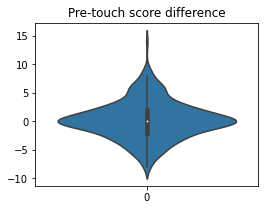

In [61]:
plt.figure(figsize=(4, 3))
sb.violinplot(touches_binary['score_diff_pre'])
plt.title('Pre-touch score difference')
plt.show()

## Does attack initation relate to score difference
Variables involved: init_fotl, init_fotr, init_neither, score_diff

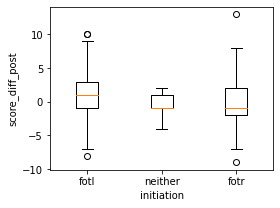

left initiation: mean =  0.910958904109589 standard dev =  3.5052235636529434
neither initiation: mean =  -0.6923076923076923 standard dev =  1.7269187938956652
right initiation: mean =  -0.25 standard dev =  3.4360657180920766


In [37]:
# specify which variable we are using as dependent variable, e.g. score_diff (left lead) or scorer_lead (scorer lead duh.)
df = touches_binary.copy()

# change dep_var to use different type of score difference as the dependent varaible (y-axis)
dep_var = 'score_diff_post'

plt.figure(figsize=(4, 3))
B = plt.boxplot([df[dep_var].loc[df['init_fotl']==1],
             df[dep_var].loc[df['init_neither']==1],
             df[dep_var].loc[df['init_fotr']==1]],
           labels=['fotl', 'neither', 'fotr'])
plt.ylabel(dep_var)
plt.xlabel('initiation')
plt.show()

column_data=df[dep_var].loc[df['init_fotl']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('left initiation: mean = ', mean, 'standard dev = ', std)

column_data=df[dep_var].loc[df['init_neither']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('neither initiation: mean = ', mean, 'standard dev = ', std)

column_data=df[dep_var].loc[df['init_fotr']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('right initiation: mean = ', mean, 'standard dev = ', std)

# ^

Score difference (pre or post) are calculated by left - right score. Positive value indicates a left fencer lead and negative value indicates a right fencer lead. 

### Pre-touch score difference

Foil: 
<br>left initiation: mean =  0.20333102012491325 standard dev =  3.6474991205228156
<br>neither initiation: mean =  -0.2523076923076923 standard dev =  4.133655774150963
<br>right initiation: mean =  0.1204906204906205 standard dev =  3.7875468142852893

Sabre: 
<br>left initiation: mean =  0.6164383561643836 standard dev =  3.339797947240494
<br>neither initiation: mean =  -0.3076923076923077 standard dev =  1.635407048113023
<br>right initiation: mean =  -0.03571428571428571 standard dev =  3.3002396326104964

Epee: 
<br>left initiation: mean =  -0.16408668730650156 standard dev =  2.72262814978853
<br>neither initiation: mean =  0.9 standard dev =  3.505709628591621
<br>right initiation: mean =  0.41297935103244837 standard dev =  2.7695046525006215

========================================================================================
### Post_touch score difference 

foil
<br>left initiation: mean =  0.46564885496183206 standard dev =  3.7914537025487807
<br>neither initiation: mean =  -0.2553846153846154 standard dev =  4.443769389891035
<br>right initiation: mean =  -0.09668109668109669 standard dev =  3.9903423033273064

sabre
<br>left initiation: mean =  0.910958904109589 standard dev =  3.5052235636529434
<br>neither initiation: mean =  -0.6923076923076923 standard dev =  1.7269187938956652
<br>right initiation: mean =  -0.25 standard dev =  3.4360657180920766

epee
<br>left initiation: mean =  0.006191950464396285 standard dev =  2.916796461501889
<br>neither initiation: mean =  1.0 standard dev =  3.9496835316262997
<br>right initiation: mean =  0.36578171091445427 standard dev =  3.0194272972017955


In [97]:
X_data = df[['init_fotl', 'init_fotr', 'init_neither']]

X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    df[dep_var], shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 0.43594009983361204
coefficients [-0.20974962 -0.14166217  0.3480599 ]
the mse on test set is 13.862439177233044


# ^
This linear regression looks really **useless**.

## v

## For this block below we are using the complete data with all weapons and we are not using one hot encoding.

want: given left is leading, what proportions of the next point is initiated by left/neither/right fencer.
- visualization: two proportion bar graphs, one for left lead one for right lead
- three bars by weapon, vertically stack left/neither/right

In [50]:
# load data
df = pd.read_csv('data/fencing-touches-combine.csv')
# remove unnecessary columns: weapon_y, created_date, tournament_id, gfycat_gfy_id, fotl_name, fotr_name, download_url
df = df.drop(columns=['weapon_y', 'stats_id', 'created_date', 'tournament_id', 'gfycat_gfy_id', 
                              'fotl_name', 'fotr_name', 'download_url', 'gender', 'strip_location', 'body_location'])
df = df.dropna()
df = pd.get_dummies(df, prefix=['touch'], 
                         columns=['touch'])
print('length after na ', len(df))
print('sabre: ', len(df.loc[df.weapon_x == 'sabre']))
print('epee: ', len(df.loc[df.weapon_x == 'epee']))
print('foil: ', len(df.loc[df.weapon_x == 'foil']))
# get pre touch score difference 
df['left_score_pre'] = df.left_score - df.touch_left
df['right_score_pre'] = df.right_score - df.touch_right
df['dummy'] = 1  # used for counting

# get numerical initialization count
df['score_diff_pre'] = df['left_score_pre'] - df['right_score_pre']

df_left = df.loc[df['score_diff_pre']> 0] # left lead
df_right = df.loc[df['score_diff_pre']< 0] # right lead


length after na  4151
sabre:  327
epee:  672
foil:  3152


In [51]:
# overall who's more likely to initiate, given lead
perc_ll_li = df.loc[(df.initiated == 'fotl') & (df.score_diff_pre > 0)].dummy.sum()/df.loc[df.score_diff_pre > 0].dummy.sum()
perc_ll_ri = df.loc[(df.initiated == 'fotr') & (df.score_diff_pre > 0)].dummy.sum()/df.loc[df.score_diff_pre > 0].dummy.sum()
perc_rl_li = df.loc[(df.initiated == 'fotl') & (df.score_diff_pre < 0)].dummy.sum()/df.loc[df.score_diff_pre < 0].dummy.sum()
perc_rl_ri = df.loc[(df.initiated == 'fotr') & (df.score_diff_pre < 0)].dummy.sum()/df.loc[df.score_diff_pre < 0].dummy.sum()

print('out of all left leading, ', perc_ll_li, ' of the next points is left initiated, ', perc_ll_ri, ' right initiated')
print('out of all right leading, ', perc_rl_li, ' of the next points is left initiated, ', perc_rl_ri, ' right initiated')

out of all left leading,  0.45353982300884954  of the next points is left initiated,  0.4657079646017699  right initiated
out of all right leading,  0.4721563981042654  of the next points is left initiated,  0.43364928909952605  right initiated


In [34]:
df_oneweap = df.loc[df.weapon_x == 'foil']
print(len(df_oneweap))
li_tl = len(df_oneweap.loc[(df_oneweap.initiated == 'fotl') & (df_oneweap.touch_left == 1)])
li_tr = len(df_oneweap.loc[(df_oneweap.initiated == 'fotl') & (df_oneweap.touch_right == 1)])
print('left initation and score = ', li_tl, 'left initiation and right score = ', li_tr)

ri_tl = len(df_oneweap.loc[(df_oneweap.initiated == 'fotr') & (df_oneweap.touch_left == 1)])
ri_tr = len(df_oneweap.loc[(df_oneweap.initiated == 'fotr') & (df_oneweap.touch_right == 1)])
print('right initation and score = ', ri_tl, 'right initiation and right score = ', ri_tr)


130
left initation and score =  37 left initiation and right score =  30
right initation and score =  19 right initiation and right score =  31


## ^
Overall (across all weapons), if a fencer is leading, they are less likely to initiate attack. 

## v
Below we look at percent each type of initation by weapon by leading side.

initiated      fotl      fotr   neither
weapon_x                               
epee       0.389655  0.596552  0.013793
foil       0.537037  0.444444  0.018519
sabre      0.525180  0.453237  0.021583


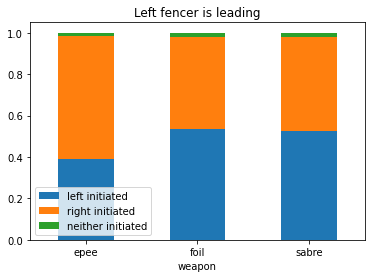

In [63]:
prop = ((df_left.groupby(['weapon_x', 'initiated']).dummy.sum()
         /df_left.dummy.sum()).unstack('initiated'))
prop = prop.div(prop.sum(axis=1),axis=0)
print(prop)

ax = prop.plot.bar(stacked='True', title='Left fencer is leading',
                  rot = 0)
ax.legend(['left initiated', 'right initiated', 'neither initiated'])
plt.xlabel('weapon')
plt.show()

initiated      fotl      fotr   neither
weapon_x                               
epee       0.588710  0.387097  0.024194
foil       0.592593  0.407407       NaN
sabre      0.395161  0.564516  0.040323


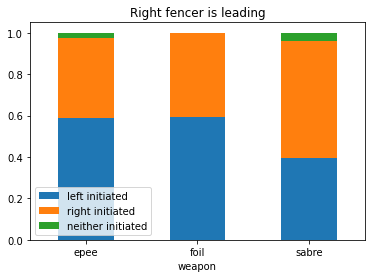

In [43]:
prop = ((df_right.groupby(['weapon_x', 'initiated']).dummy.sum()
         /df_right.dummy.sum()).unstack('initiated'))
prop = prop.div(prop.sum(axis=1),axis=0)
print(prop)

ax = prop.plot.bar(stacked='True', title='Right fencer is leading',
                  rot = 0)
ax.legend(['left initiated', 'right initiated', 'neither initiated'])
plt.xlabel('weapon')
plt.show()


# v


### Does attack location relate to score difference
Variables involved: stp_loc_fotl_warning_box, stp_loc_fotl_half, stp_loc_middle, stp_loc_fotr_half, stp_loc_fotr_warning_box, score_diff

In [95]:
df = touches_binary.copy()
dep_var = 'scorer_lead'

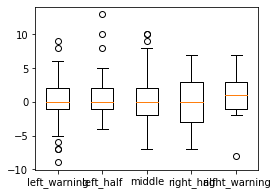

In [38]:
plt.figure(figsize=(4, 3))
plt.boxplot([df[dep_var].loc[df['stp_loc_fotl_warning_box']==1],
             df[dep_var].loc[df['stp_loc_fotl_half']==1],
             df[dep_var].loc[df['stp_loc_middle']==1],
             df[dep_var].loc[df['stp_loc_fotr_half']==1],
             df[dep_var].loc[df['stp_loc_fotr_warning_box']==1]],
           labels=['left_warning', 'left_half', 'middle', 'right_half', 'right_warning'])
plt.show()

In [62]:
X_data = df[['stp_loc_fotl_warning_box', 'stp_loc_fotl_half', 'stp_loc_middle', 
                         'stp_loc_fotr_half', 'stp_loc_fotr_warning_box']]

X_train, X_test, y_train, y_test = train_test_split(X_data, df[dep_var], 
                                                    shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 1.3943661971830998
coefficients [-0.0576315  -0.33306352 -0.0283662  -0.28692818 -0.41023921]
the mse on test set is 13.948299087549806
